In [70]:
import pandas as pd

data = pd.read_csv("CA_housing.csv")

In [71]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [73]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [74]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

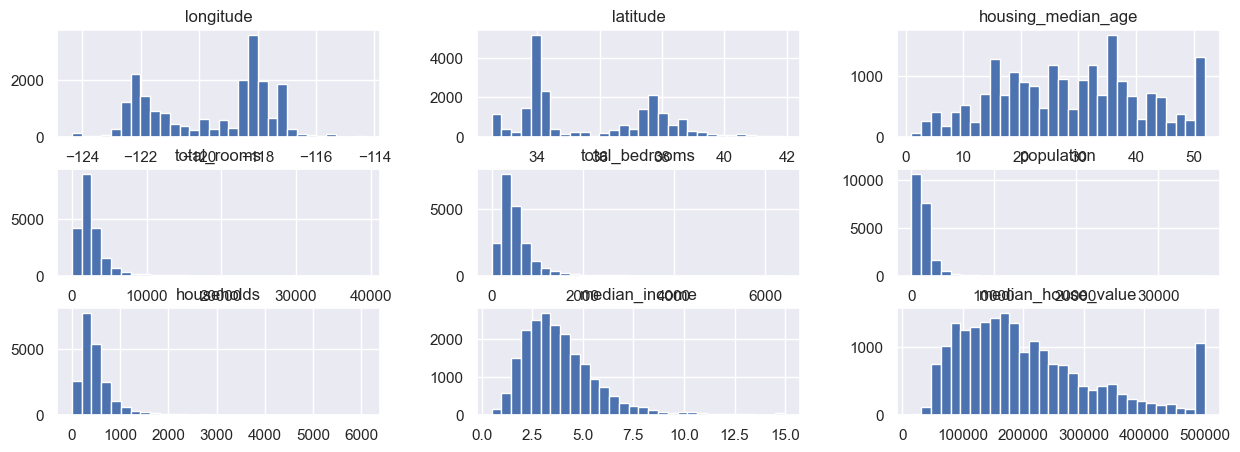

In [75]:
data.hist(bins=30, figsize=[15,5])

<Axes: xlabel='latitude', ylabel='longitude'>

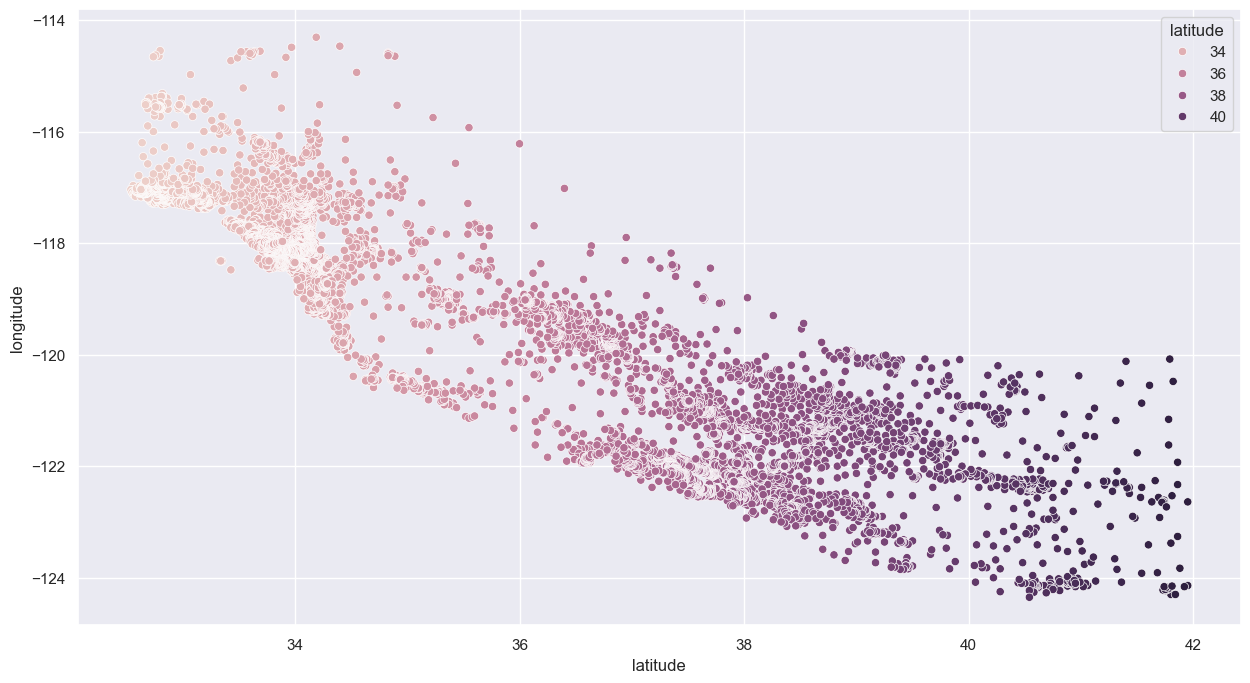

In [76]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=data, hue="latitude")

In [96]:
clean_data = data.dropna()
# Dummies / One-hot encoding
clean_data.info()

dummies = pd.get_dummies(clean_data["ocean_proximity"], dtype=int)


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [97]:
clean_data = clean_data.join(dummies)

In [98]:
clean_data = clean_data.drop(["ocean_proximity"], axis=1)

In [80]:
clean_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
max_values = { 'median_house_value': 500000, 'median_income': 15, 'housing_median_age': 50 }

for prop, value in max_values.items():
    index = clean_data[clean_data[prop] >= value].index
    clean_data.drop(index, inplace=True)

clean_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.00000,18195.000000,18195.000000,18195.000000,18195.000000
mean,-119.478469,35.589778,26.757021,2678.415499,549.407859,1474.617367,509.890300,3.698224,189245.968508,0.44875,0.343611,0.000110,0.082440,0.125089
std,1.979162,2.148169,11.267991,2235.553359,430.854654,1167.572934,390.828534,1.565775,95255.885596,0.49738,0.474926,0.010484,0.275042,0.330829
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-121.530000,33.920000,17.000000,1461.000000,300.000000,814.000000,284.000000,2.541100,115300.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,-118.450000,34.240000,27.000000,2146.000000,443.000000,1208.000000,416.000000,3.478400,171200.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,-117.970000,37.670000,36.000000,3191.500000,660.000000,1784.000000,615.000000,4.625000,242850.000000,1.00000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,49.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.147700,499100.000000,1.00000,1.000000,1.000000,1.000000,1.000000


<Axes: >

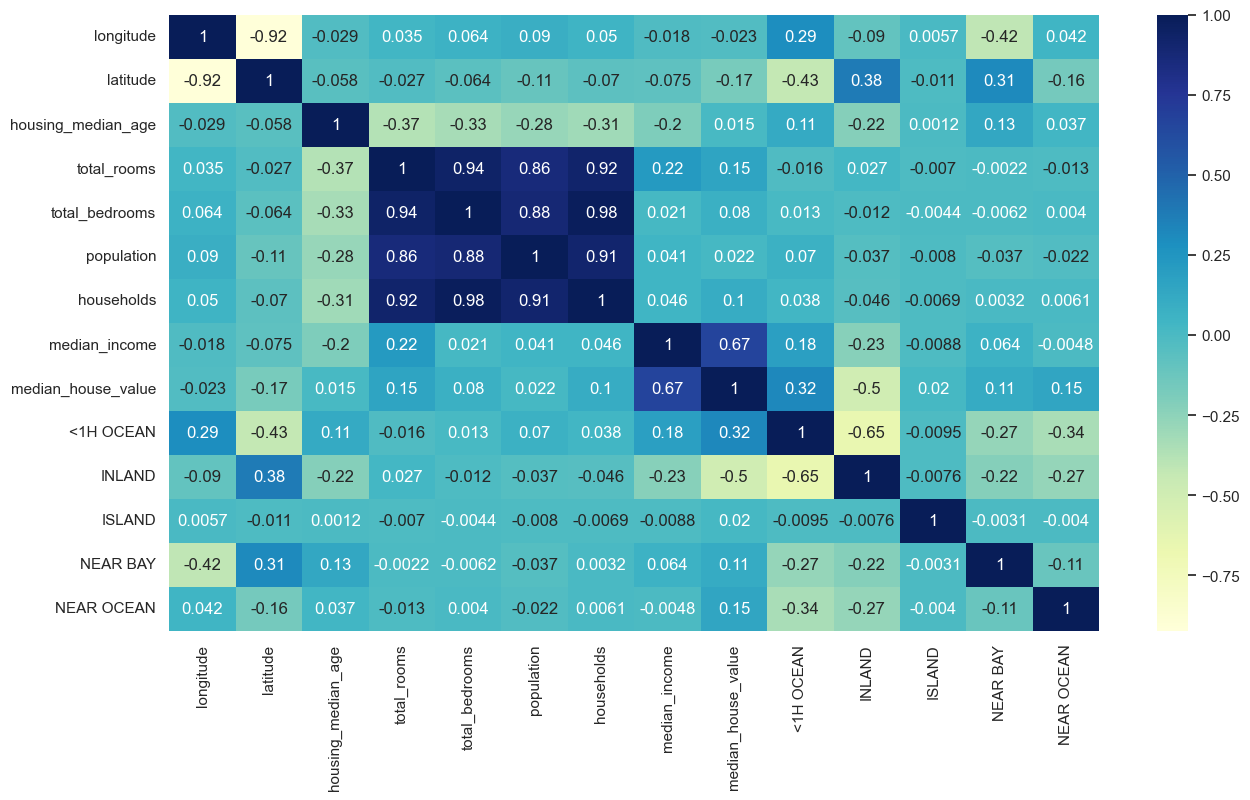

In [102]:
clean_data.corr()

sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(clean_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='median_house_value', ylabel='median_income'>

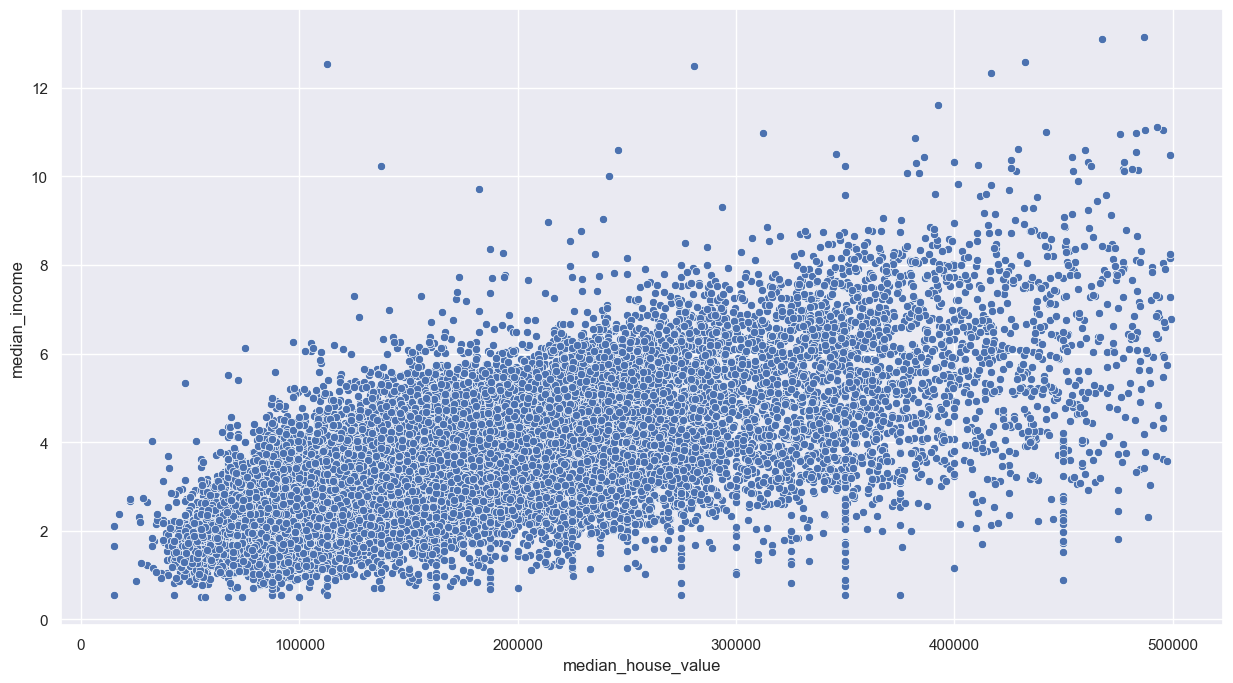

In [103]:
# For linear regression, the scatter plot is the best view ever
sb.scatterplot(x=clean_data["median_house_value"], y=clean_data["median_income"])

In [104]:
clean_data["bedroom_ratio"] = clean_data["total_bedrooms"] / clean_data["total_rooms"]

<Axes: >

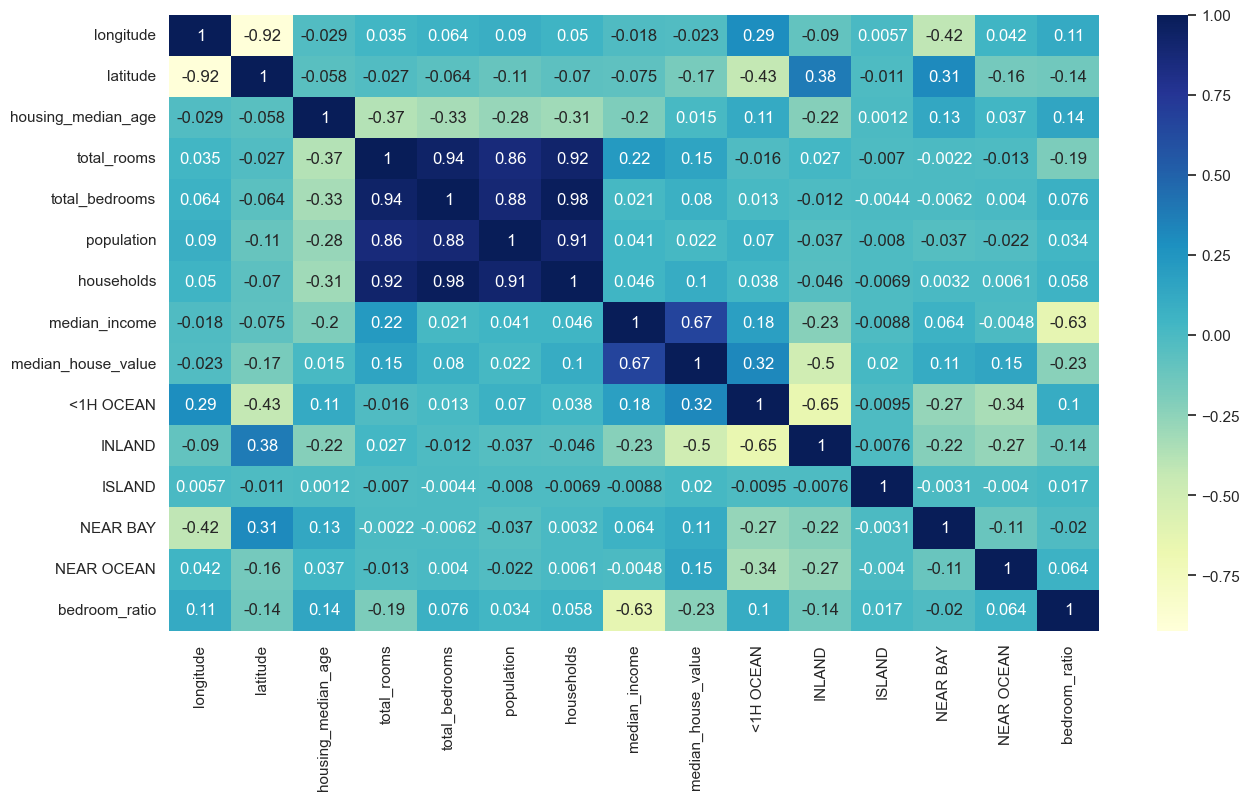

In [105]:
sb.heatmap(clean_data.corr(), annot=True, cmap="YlGnBu")

In [106]:
# Separate caracteristicas of labels
x = clean_data.drop(["median_house_value"], axis=1)
y = clean_data["median_house_value"]

In [107]:
# Separar datos en dos partes, uno de entrenamiento, uno de pruebas
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [108]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [109]:
predictions = model.predict(x_test)
comparisson = {"Prediccion": predictions, "Real value": y_test}
pd.DataFrame(comparisson)

,Prediccion,Real value
1018,259222.634525,211000.0
2548,126420.316266,64600.0
4437,160055.920073,138200.0
6927,161664.189217,143800.0
19340,211677.872641,173700.0
...,...,...
19087,194730.233825,165100.0
9839,269584.624904,226400.0
10107,199202.360987,178200.0
13889,-14618.601417,22500.0


In [110]:
# Overfit, (over trained) it can not predict with new data
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.6375878710952403
0.62226544773668


In [91]:
# Error margin
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
print(mse)

3505720758.7365084


In [92]:
rmse = np.sqrt(mse)

In [93]:
rmse

59209.127326253576

In [94]:
# scaling
clean_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.00000,18377.00000,18377.000000
mean,-119.484685,35.593632,26.970833,2669.874898,548.062252,1470.048376,508.667791,3.692468,189543.287642,0.448006,0.342276,0.000109,0.08429,0.12532,0.214024
std,1.980652,2.148176,11.432175,2227.773475,429.418391,1163.829372,389.536297,1.565323,95748.942059,0.497303,0.474484,0.010432,0.27783,0.33109,0.055542
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.100000
25%,-121.550000,33.920000,17.000000,1458.000000,300.000000,811.000000,284.000000,2.537000,115400.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.177109
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.470300,171200.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.203854
75%,-117.970000,37.670000,36.000000,3182.000000,659.000000,1779.000000,614.000000,4.616700,243200.000000,1.000000,1.000000,0.000000,0.00000,0.00000,0.240347
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.147700,500000.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_esc = scaler.fit_transform(x_train)
x_test_esc = scaler.fit_transform(x_test)